In [40]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d
import numpy as np

In [41]:
x,y = make_circles(n_samples=500, noise=.02)

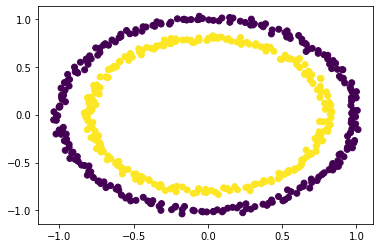

In [42]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [43]:
def phi(x):
  x1 = x[:,0]
  x2 = x[:,1]
  x3 = x1**2 + x2**2
  x_ = np.zeros((x.shape[0],3))
  x_[:,:-1] = x
  x_[:,-1] = x3
  return x_

In [44]:
x_ = phi(x)

In [45]:
def plot3d(x,show=True):
  fig = plt.figure(figsize=(15,15))
  ax = fig.add_subplot(111,projection='3d')
  ax.scatter(x[:,0],x[:,1],x[:,2],zdir='z',s=20,c=y,depthshade=True)
  if show:
    plt.show()
  return ax

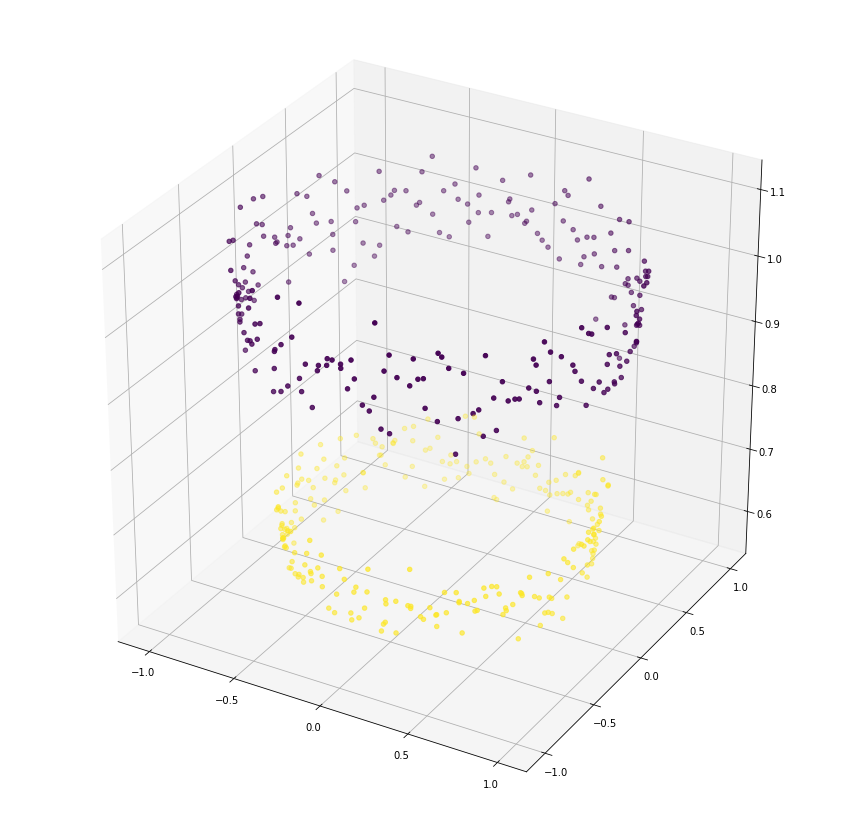

In [46]:
ax = plot3d(x_)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [48]:
lr = LogisticRegression()

In [49]:
#2D data accuracy
acc = cross_val_score(lr,x,y,cv=5).mean()
acc

0.43599999999999994

In [50]:
#3d data accuracy
acc3d = cross_val_score(lr,x_,y,cv=5).mean()
acc3d

1.0

In [51]:
lr.fit(x_,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
w = lr.coef_

In [53]:
b = lr.intercept_

In [61]:
xx,yy = np.meshgrid(range(-1,2),range(-1,2))

In [62]:
xx,yy

(array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]), array([[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]]))

In [63]:
z = -(w[0,0]*xx + w[0,1]*yy+b)/w[0,2]

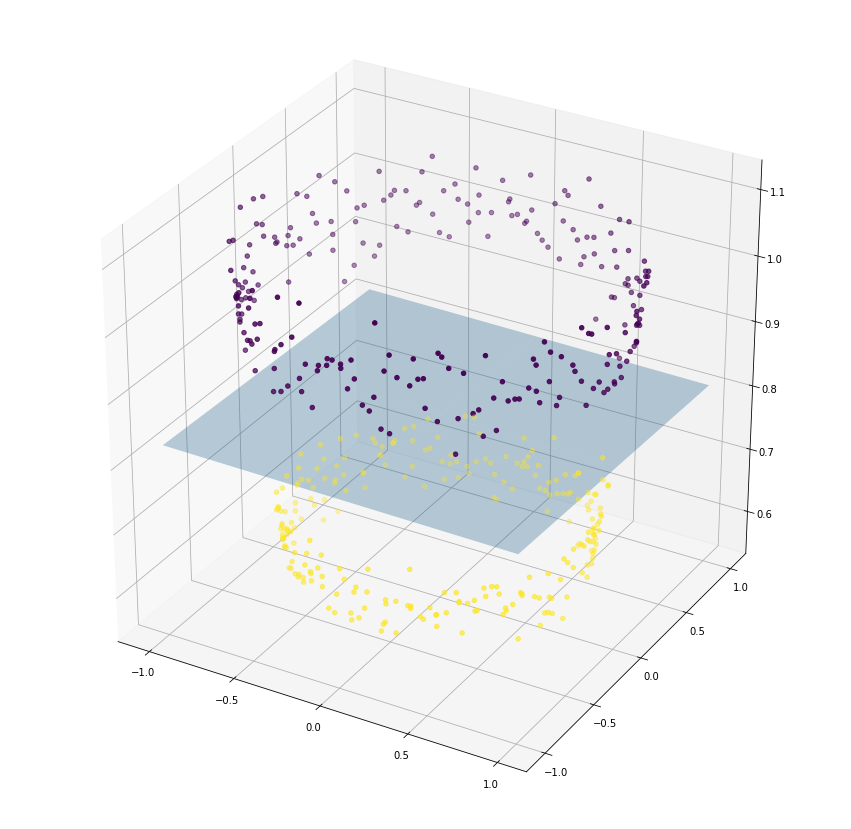

In [66]:
ax = plot3d(x_,False)
ax.plot_surface(xx,yy,z,alpha = 0.3)
plt.show()